In [1]:
import roboticstoolbox as rtb
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

## Exportando las propiedades del robot UR5

In [61]:
ur5_inf = rtb.models.UR5()
ur5_inf

ERobot: UR5 (by Universal Robotics), 6 joints (RRRRRR), 1 gripper, 3 branches, dynamics, geometry, collision
┌─────┬────────────────┬───────┬────────────────┬──────────────────────────────────────────┐
│link │      link      │ joint │     parent     │           ETS: parent to link            │
├─────┼────────────────┼───────┼────────────────┼──────────────────────────────────────────┤
│   0 │ world          │       │ BASE           │                                          │
│   1 │ base_link      │       │ world          │ SE3()                                    │
│   2 │ shoulder_link  │     0 │ base_link      │ SE3(0, 0, 0.08916) ⊕ Rz(q0)              │
│   3 │ upper_arm_link │     1 │ shoulder_link  │ SE3(0, 0.1358, 0; 0°, 90°, -0°) ⊕ Ry(q1) │
│   4 │ forearm_link   │     2 │ upper_arm_link │ SE3(0, -0.1197, 0.425) ⊕ Ry(q2)          │
│   5 │ wrist_1_link   │     3 │ forearm_link   │ SE3(0, 0, 0.3922; 0°, 90°, -0°) ⊕ Ry(q3) │
│   6 │ wrist_2_link   │     4 │ wrist_1_link   │ SE3(

In [62]:
ur5 = rtb.models.DH.UR5()
ur5

DHRobot: UR5 (by Universal Robotics), 6 joints (RRRRRR), dynamics, standard DH parameters
┌────┬─────────┬─────────┬────────┐
│θⱼ  │   dⱼ    │   aⱼ    │   ⍺ⱼ   │
├────┼─────────┼─────────┼────────┤
│ q1 │ 0.08946 │       0 │  90.0° │
│ q2 │       0 │  -0.425 │   0.0° │
│ q3 │       0 │ -0.3922 │   0.0° │
│ q4 │  0.1091 │       0 │  90.0° │
│ q5 │ 0.09465 │       0 │ -90.0° │
│ q6 │  0.0823 │       0 │   0.0° │
└────┴─────────┴─────────┴────────┘

┌─┬──┐
└─┴──┘

┌─────┬───────┬─────┬─────┬─────┬──────┬─────┐
│name │ q0    │ q1  │ q2  │ q3  │ q4   │ q5  │
├─────┼───────┼─────┼─────┼─────┼──────┼─────┤
│  qr │  180° │  0° │  0° │  0° │  90° │  0° │
│  qz │  0°   │  0° │  0° │  0° │  0°  │  0° │
└─────┴───────┴─────┴─────┴─────┴──────┴─────┘

## Cinematica directa

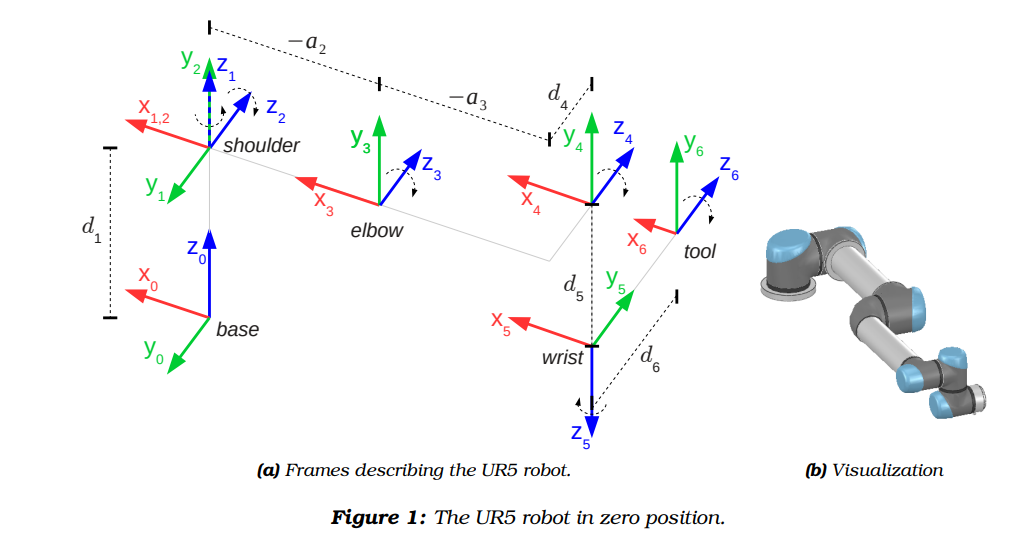

In [4]:
def sTrasl(x, y, z):
    """ Transformación homogénea que representa traslación pura
    """
    T = sp.Matrix([[1,0,0,x],
                   [0,1,0,y],
                   [0,0,1,z],
                   [0,0,0,1]])
    return T

def sTrotx(ang):
    """ Transformación homogénea que representa rotación alrededor de x
    """
    T = sp.Matrix([[1, 0,0,0],
                   [0, sp.cos(ang),-sp.sin(ang),0],
                   [0, sp.sin(ang), sp.cos(ang),0],
                   [0, 0, 0, 1]])
    return T

def sTrotz(ang):
    """ Transformación homogénea que representa rotación alrededor de z
    """
    T = sp.Matrix([[sp.cos(ang),-sp.sin(ang),0,0],
                   [sp.sin(ang), sp.cos(ang),0,0],
                   [0,0,1,0],
                   [0,0,0,1]])
    return T

In [5]:
# Variables que serán utilizadas
q1, q2, q3,q4,q5,q6 = sp.symbols('q1 q2 q3 q4 q5 q6')
l1, l2, l3, l4,l5,l6 = sp.symbols('l1 l2 l3 l4 l5 l6')

# Transformaciones con respecto al sistema anterior
T01 = sTrasl(0,0,l1)*sTrotz(q1)
T12 = sTrotx(sp.pi/2)*sTrotz(q2)
T23 = sTrasl(-l2,0,0)*sTrotz(q3)
T34 = sTrasl(-l3,0,l4)*sTrotz(q4)
T45 = sTrasl(0,-l5,0)*sTrotx(sp.pi/2)*sTrotz(q5)
T5e =sTrasl(0,l6,0)*sTrotx(-sp.pi/2)*sTrotz(q6)

# Transformación del efector con respecto a la base
T0e = sp.simplify(T01*T12*T23*T34*T45*T5e)

# Mostrar las transformaciones homogéneas (display funciona con IPython)
print("T01:"); display(T01)
print("T12:"); display(T12)
print("T23:"); display(T23)
print("T34:"); display(T34)
print("T45:"); display(T45)
print("T56:"); display(T5e)
print("T06:"); display(T0e)

T01:


Matrix([
[cos(q1), -sin(q1), 0,  0],
[sin(q1),  cos(q1), 0,  0],
[      0,        0, 1, l1],
[      0,        0, 0,  1]])

T12:


Matrix([
[cos(q2), -sin(q2),  0, 0],
[      0,        0, -1, 0],
[sin(q2),  cos(q2),  0, 0],
[      0,        0,  0, 1]])

T23:


Matrix([
[cos(q3), -sin(q3), 0, -l2],
[sin(q3),  cos(q3), 0,   0],
[      0,        0, 1,   0],
[      0,        0, 0,   1]])

T34:


Matrix([
[cos(q4), -sin(q4), 0, -l3],
[sin(q4),  cos(q4), 0,   0],
[      0,        0, 1,  l4],
[      0,        0, 0,   1]])

T45:


Matrix([
[cos(q5), -sin(q5),  0,   0],
[      0,        0, -1, -l5],
[sin(q5),  cos(q5),  0,   0],
[      0,        0,  0,   1]])

T56:


Matrix([
[ cos(q6), -sin(q6), 0,  0],
[       0,        0, 1, l6],
[-sin(q6), -cos(q6), 0,  0],
[       0,        0, 0,  1]])

T06:


Matrix([
[(sin(q1)*sin(q5) + cos(q1)*cos(q5)*cos(q2 + q3 + q4))*cos(q6) - sin(q6)*sin(q2 + q3 + q4)*cos(q1), -(sin(q1)*sin(q5) + cos(q1)*cos(q5)*cos(q2 + q3 + q4))*sin(q6) - sin(q2 + q3 + q4)*cos(q1)*cos(q6),  sin(q1)*cos(q5) - sin(q5)*cos(q1)*cos(q2 + q3 + q4), -l2*cos(q1)*cos(q2) - l3*cos(q1)*cos(q2 + q3) + l4*sin(q1) + l5*sin(q2 + q3 + q4)*cos(q1) + l6*(sin(q1)*cos(q5) - sin(q5)*cos(q1)*cos(q2 + q3 + q4))],
[(sin(q1)*cos(q5)*cos(q2 + q3 + q4) - sin(q5)*cos(q1))*cos(q6) - sin(q1)*sin(q6)*sin(q2 + q3 + q4), (-sin(q1)*cos(q5)*cos(q2 + q3 + q4) + sin(q5)*cos(q1))*sin(q6) - sin(q1)*sin(q2 + q3 + q4)*cos(q6), -sin(q1)*sin(q5)*cos(q2 + q3 + q4) - cos(q1)*cos(q5), -l2*sin(q1)*cos(q2) - l3*sin(q1)*cos(q2 + q3) - l4*cos(q1) + l5*sin(q1)*sin(q2 + q3 + q4) - l6*(sin(q1)*sin(q5)*cos(q2 + q3 + q4) + cos(q1)*cos(q5))],
[                                    sin(q6)*cos(q2 + q3 + q4) + sin(q2 + q3 + q4)*cos(q5)*cos(q6),                                     -sin(q6)*sin(q2 + q3 + q4)*cos(q5) + cos(q6)*

### Cinematica inversa

#### Jacobiano

In [69]:
from sympy import sin, cos, Matrix

q1, q2, q3,q4,q5,q6 = sp.symbols('q1 q2 q3 q4 q5 q6')
l1, l2, l3, l4,l5,l6 = sp.symbols('l1 l2 l3 l4 l5 l6')

# Definir las funciones x, y, z
x = -l2*cos(q1)*cos(q2)-l3*cos(q1)*cos(q2*q3)+l4*sin(q1)+l5*sin(q2+q3+q4)*cos(q1)+l6*(sin(q1)*cos(q5)-sin(q5)*cos(q1)*cos(q2+q3+q4))
y = -l2*sin(q1)*cos(q2)-l3*sin(q1)*cos(q2+q3)-l4*cos(q1)+l5*sin(q1)*sin(q2+q3+q4)-l6*(sin(q1)*sin(q5)*cos(q2+q3+q4)+cos(q1)*cos(q5))
z = l1-l2*sin(q2)-l3*sin(q2+q3)-l5*cos(q2+q3+q4)-l6*sin(q5)*sin(q2+q3+q4)
X = Matrix([x,y,z])
Y = Matrix([q1,q2,q3,q4,q5])
J = X.jacobian(Y)
display(J)

Matrix([
[    l2*sin(q1)*cos(q2) + l3*sin(q1)*cos(q2*q3) + l4*cos(q1) - l5*sin(q1)*sin(q2 + q3 + q4) + l6*(sin(q1)*sin(q5)*cos(q2 + q3 + q4) + cos(q1)*cos(q5)), l2*sin(q2)*cos(q1) + l3*q3*sin(q2*q3)*cos(q1) + l5*cos(q1)*cos(q2 + q3 + q4) + l6*sin(q5)*sin(q2 + q3 + q4)*cos(q1), l3*q2*sin(q2*q3)*cos(q1) + l5*cos(q1)*cos(q2 + q3 + q4) + l6*sin(q5)*sin(q2 + q3 + q4)*cos(q1), l5*cos(q1)*cos(q2 + q3 + q4) + l6*sin(q5)*sin(q2 + q3 + q4)*cos(q1), l6*(-sin(q1)*sin(q5) - cos(q1)*cos(q5)*cos(q2 + q3 + q4))],
[-l2*cos(q1)*cos(q2) - l3*cos(q1)*cos(q2 + q3) + l4*sin(q1) + l5*sin(q2 + q3 + q4)*cos(q1) - l6*(-sin(q1)*cos(q5) + sin(q5)*cos(q1)*cos(q2 + q3 + q4)),  l2*sin(q1)*sin(q2) + l3*sin(q1)*sin(q2 + q3) + l5*sin(q1)*cos(q2 + q3 + q4) + l6*sin(q1)*sin(q5)*sin(q2 + q3 + q4),  l3*sin(q1)*sin(q2 + q3) + l5*sin(q1)*cos(q2 + q3 + q4) + l6*sin(q1)*sin(q5)*sin(q2 + q3 + q4), l5*sin(q1)*cos(q2 + q3 + q4) + l6*sin(q1)*sin(q5)*sin(q2 + q3 + q4), -l6*(sin(q1)*cos(q5)*cos(q2 + q3 + q4) - sin(q5)*cos(q1))],
[  

#### Metodo de Newton

In [57]:
import numpy as np
import math

def cinematica_inversa_RRRRRR_Newton(Xdeseado, Qinicial, L, max_iter=100, epsilon=1e-4):
    """ 
        Esta funcion realiza la cinematica inversa de un robot RRRRRR mediante el metodo
        de Newton

        Parametros

        - Xdeseado: Es un array de 3 espacios en donde se va a especificar las posiciones [x,y,z] deseadas
        - Qinicial: Es un array de 3 espacios con los valores ariculares iniciales del robot RRRRRR
        - L = Es un array de 4 espacios con las distancias de cada uno de los eslabones del robot
        - max_iter: Es el numero maximo de iteraciones que va a hacer el algoritmo, por defecto son 100
        - epsilon: Es el error maximo que admite el algoritmo antes de llegar al limite de iteraciones, por defecto es 1e-4

        Retornos
        - q: Es un array de 3 espacios con los valores articulares finales
        - ee Es un array que almacena los errores obtenidos en cada iteracion

    """

    q = Qinicial.copy()
    ee = []
    

    for i in range(max_iter):

        q1, q2, q3,q4,q5,q6 = sp.symbols('q1 q2 q3 q4 q5 q6')
        l1, l2, l3, l4,l5,l6 = sp.symbols('l1 l2 l3 l4 l5 l6')

        x = -l2*cos(q1)*cos(q2)-l3*cos(q1)*cos(q2*q3)+l4*sin(q1)+l5*sin(q2+q3+q4)*cos(q1)+l6*(sin(q1)*cos(q5)-sin(q5)*cos(q1)*cos(q2+q3+q4))
        y = -l2*sin(q1)*cos(q2)-l3*sin(q1)*cos(q2+q3)-l4*cos(q1)+l5*sin(q1)*sin(q2+q3+q4)-l6*(sin(q1)*sin(q5)*cos(q2+q3+q4)+cos(q1)*cos(q5))
        z = l1-l2*sin(q2)-l3*sin(q2+q3)-l5*cos(q2+q3+q4)-l6*sin(q5)*sin(q2+q3+q4)
        X = Matrix([x,y,z])
        Y = Matrix([q1,q2,q3,q4,q5])
        J = X.jacobian(Y).subs([(q1,q[0]), (q2,q[1]),(q3,q[2]),(q4,q[3]), (q5, q[4]), (l1, L[0]), (l2,L[1]), (l3, L[2]), (l4, L[3]), (l5, L[4]), (l6, L[5])])

        Ja = np.array(J).astype('float64')
        
        x_np = np.array(x.subs([(q1,q[0]), (q2,q[1]),(q3,q[2]),(q4,q[3]), (q5, q[4]), (l1, L[0]), (l2,L[1]), (l3, L[2]), (l4, L[3]), (l5, L[4]), (l6, L[5])])).astype('float64')
        y_np = np.array(y.subs([(q1,q[0]), (q2,q[1]),(q3,q[2]),(q4,q[3]), (q5, q[4]), (l1, L[0]), (l2,L[1]), (l3, L[2]), (l4, L[3]), (l5, L[4]), (l6, L[5])])).astype('float64')
        z_np = np.array(z.subs([(q1,q[0]), (q2,q[1]),(q3,q[2]),(q4,q[3]), (q5, q[4]), (l1, L[0]), (l2,L[1]), (l3, L[2]), (l4, L[3]), (l5, L[4]), (l6, L[5])])).astype('float64')
        
        f = np.array([x_np, y_np, z_np])
        
        e = Xdeseado-f
    
        q = q + np.dot(np.linalg.pinv(Ja), e)
        
        enorm = np.linalg.norm(e)
        print("Error en la iteración {}: {}".format(i, np.round(enorm,4)))
        ee.append(enorm)  

        if (enorm < epsilon):
            break
    return q, ee
    #pass

# Parámetros del robot

L = np.array([0.08946, 0.425, 0.3922, 0.1091, 0.09465, 0.0823])


qinit  = np.array([0, 0, 0, 0, 0])



xd = np.array([0.8996 , 0.1091, -0.005191])
epsilon = 1e-4        
max_iteraciones = 100 
 
q, e = cinematica_inversa_RRRRRR_Newton(xd, qinit, L, max_iteraciones, epsilon)
print("\nValores articulares obtenidos:", np.round(q,4))

Error en la iteración 0: 1.7429
Error en la iteración 1: 0.8705
Error en la iteración 2: 0.4321
Error en la iteración 3: 0.899
Error en la iteración 4: 0.257
Error en la iteración 5: 0.5909
Error en la iteración 6: 0.2258
Error en la iteración 7: 0.709
Error en la iteración 8: 0.0117
Error en la iteración 9: 0.0024
Error en la iteración 10: 0.0001

Valores articulares obtenidos: [ 0.2254 -2.913   5.5204 10.9006 -8.104 ]


#### Metodo del descenso del gradiente

In [68]:
# Función que realiza el cálculo de la cinemática inversa (calculado usando el método de Newton)
def cinematica_inversa_RRRRRR_Gradiente(Xdeseado, Qinicial, L, alfa=0.2, max_iter=100, epsilon=1e-4):
    """ 
        Esta funcion realiza la cinematica inversa de un robot RRP mediante el metodo
        del descenso del gradiente.

        Parametros

        - Xdeseado: Es un array de 3 espacios en donde se va a especificar las posiciones [x,y,z] deseadas
        - Qinicial: Es un array de 3 espacios con los valores ariculares iniciales del robot RRP
        - L = Es un array de 4 espacios con las distancias de cada uno de los eslabones del robot
        - alfa = Es un valor flotante que representa el 'step size' para algorimo de descenso del gradiente, por defecto es 0.2
        - max_iter: Es el numero maximo de iteraciones que va a hacer el algoritmo, por defecto son 100
        - epsilon: Es el error maximo que admite el algoritmo antes de llegar al limite de iteraciones, por defecto es 1e-4

        Retornos
        - q: Es un array de 3 espacios con los valores articulares finales
        - ee Es un array que almacena los errores obtenidos en cada iteracion

    """

    q = Qinicial.copy()
    
    ee = []
    
    for i in range(max_iter):
        q1, q2, q3,q4,q5,q6 = sp.symbols('q1 q2 q3 q4 q5 q6')
        l1, l2, l3, l4,l5,l6 = sp.symbols('l1 l2 l3 l4 l5 l6')

        x = -l2*cos(q1)*cos(q2)-l3*cos(q1)*cos(q2*q3)+l4*sin(q1)+l5*sin(q2+q3+q4)*cos(q1)+l6*(sin(q1)*cos(q5)-sin(q5)*cos(q1)*cos(q2+q3+q4))
        y = -l2*sin(q1)*cos(q2)-l3*sin(q1)*cos(q2+q3)-l4*cos(q1)+l5*sin(q1)*sin(q2+q3+q4)-l6*(sin(q1)*sin(q5)*cos(q2+q3+q4)+cos(q1)*cos(q5))
        z = l1-l2*sin(q2)-l3*sin(q2+q3)-l5*cos(q2+q3+q4)-l6*sin(q5)*sin(q2+q3+q4)
        X = Matrix([x,y,z])
        Y = Matrix([q1,q2,q3,q4,q5])
        J = X.jacobian(Y).subs([(q1,q[0]), (q2,q[1]),(q3,q[2]),(q4,q[3]), (q5, q[4]), (l1, L[0]), (l2,L[1]), (l3, L[2]), (l4, L[3]), (l5, L[4]), (l6, L[5])])

        Ja = np.array(J).astype('float64')
        
        x_np = np.array(x.subs([(q1,q[0]), (q2,q[1]),(q3,q[2]),(q4,q[3]), (q5, q[4]), (l1, L[0]), (l2,L[1]), (l3, L[2]), (l4, L[3]), (l5, L[4]), (l6, L[5])])).astype('float64')
        y_np = np.array(y.subs([(q1,q[0]), (q2,q[1]),(q3,q[2]),(q4,q[3]), (q5, q[4]), (l1, L[0]), (l2,L[1]), (l3, L[2]), (l4, L[3]), (l5, L[4]), (l6, L[5])])).astype('float64')
        z_np = np.array(z.subs([(q1,q[0]), (q2,q[1]),(q3,q[2]),(q4,q[3]), (q5, q[4]), (l1, L[0]), (l2,L[1]), (l3, L[2]), (l4, L[3]), (l5, L[4]), (l6, L[5])])).astype('float64')
        
        f = np.array([x_np, y_np, z_np])

        e = Xdeseado-f
        q = q + alfa*np.dot(Ja.T, e)
        
        enorm = np.linalg.norm(e)
        print("Error en la iteración {}: {}".format(i, np.round(enorm,4)))
        
        ee.append(enorm)  

        if (np.linalg.norm(e) < epsilon):
            break
    return q, ee



# Parámetros del robot
L = np.array([0.08946, 0.425, 0.3922, 0.1091, 0.09465, 0.0823])


qinit  = np.array([0, 0, 0, 0, 0])


xd = np.array([0.8996 , 0.1091, -0.005191])
epsilon = 1e-5        
max_iteraciones = 10000 
 

q, e = cinematica_inversa_RRRRRR_Gradiente(xd, qinit, L, 0.02, max_iteraciones, epsilon)
print("Valores articulares obtenidos:", np.round(q,4))

Error en la iteración 0: 1.7429
Error en la iteración 1: 1.7417
Error en la iteración 2: 1.7405
Error en la iteración 3: 1.7393
Error en la iteración 4: 1.7381
Error en la iteración 5: 1.7369
Error en la iteración 6: 1.7357
Error en la iteración 7: 1.7345
Error en la iteración 8: 1.7333
Error en la iteración 9: 1.7322
Error en la iteración 10: 1.731
Error en la iteración 11: 1.7299
Error en la iteración 12: 1.7287
Error en la iteración 13: 1.7276
Error en la iteración 14: 1.7264
Error en la iteración 15: 1.7253
Error en la iteración 16: 1.7241
Error en la iteración 17: 1.723
Error en la iteración 18: 1.7219
Error en la iteración 19: 1.7208
Error en la iteración 20: 1.7196
Error en la iteración 21: 1.7185
Error en la iteración 22: 1.7174
Error en la iteración 23: 1.7163
Error en la iteración 24: 1.7152
Error en la iteración 25: 1.7141
Error en la iteración 26: 1.713
Error en la iteración 27: 1.7119
Error en la iteración 28: 1.7108
Error en la iteración 29: 1.7097
Error en la iteración 3

#### Comprobando los resultados

In [64]:
#Con valores articulares originales
Tr = ur5.fkine(ur5.qr)
Tr

   0         0         1         0.8996    
   1         0         0         0.1091    
   0         1         0        -0.005191  
   0         0         0         1         


In [90]:
#Con valores articulares obtenidos con el metodo de Newton
qn = [0.2254, -2.913, 5.5204, 10.9006, -8.104, 0]
Tn = ur5.fkine(qn)
Tn

  -0.3585   -0.7881    0.5005    0.8727    
   0.9119   -0.1807    0.3686    0.109     
  -0.2       0.5885    0.7834   -0.005172  
   0         0         0         1         


In [70]:
#Con valores articulares obtenidos con el metodo del descenso del gradiente
qg = [3.0528, 0.0461, -0.0721, -0.2381, 0.3903, 0]
Tg = ur5.fkine(qg)
Tg

  -0.8555   -0.26      0.4478    0.8846    
   0.4581    0.02315   0.8886    0.1072    
  -0.2414    0.9653    0.09932  -0.003124  
   0         0         0         1         


### Cargando el URDF

In [2]:
ur5_urdf = rtb.models.URDF.UR5()
ur5_urdf

ERobot: UR5 (by Universal Robotics), 6 joints (RRRRRR), 1 gripper, 3 branches, dynamics, geometry, collision
┌─────┬────────────────┬───────┬────────────────┬──────────────────────────────────────────┐
│link │      link      │ joint │     parent     │           ETS: parent to link            │
├─────┼────────────────┼───────┼────────────────┼──────────────────────────────────────────┤
│   0 │ world          │       │ BASE           │                                          │
│   1 │ base_link      │       │ world          │ SE3()                                    │
│   2 │ shoulder_link  │     0 │ base_link      │ SE3(0, 0, 0.08916) ⊕ Rz(q0)              │
│   3 │ upper_arm_link │     1 │ shoulder_link  │ SE3(0, 0.1358, 0; 0°, 90°, -0°) ⊕ Ry(q1) │
│   4 │ forearm_link   │     2 │ upper_arm_link │ SE3(0, -0.1197, 0.425) ⊕ Ry(q2)          │
│   5 │ wrist_1_link   │     3 │ forearm_link   │ SE3(0, 0, 0.3922; 0°, 90°, -0°) ⊕ Ry(q3) │
│   6 │ wrist_2_link   │     4 │ wrist_1_link   │ SE3(

In [3]:
qn = [0.2254, -2.913, 5.5204, 10.9006, -8.104, 0]

In [85]:
T = ur5_urdf.fkine(ur5_urdf.qr, end='tool0')
print(T)

   0         0        -1        -0.8996    
  -1         0         0        -0.1091    
   0         1         0        -0.005491  
   0         0         0         1         



In [93]:
#Posicion inicial
ur5_urdf.plot(ur5_urdf.qz, backend="swift")

Swift backend, t = 0.05, scene:
  UR5

In [10]:
#Posicion dada por metodo de newton
ur5_urdf.plot(qn, backend="swift")

Swift backend, t = 0.05, scene:
  UR5

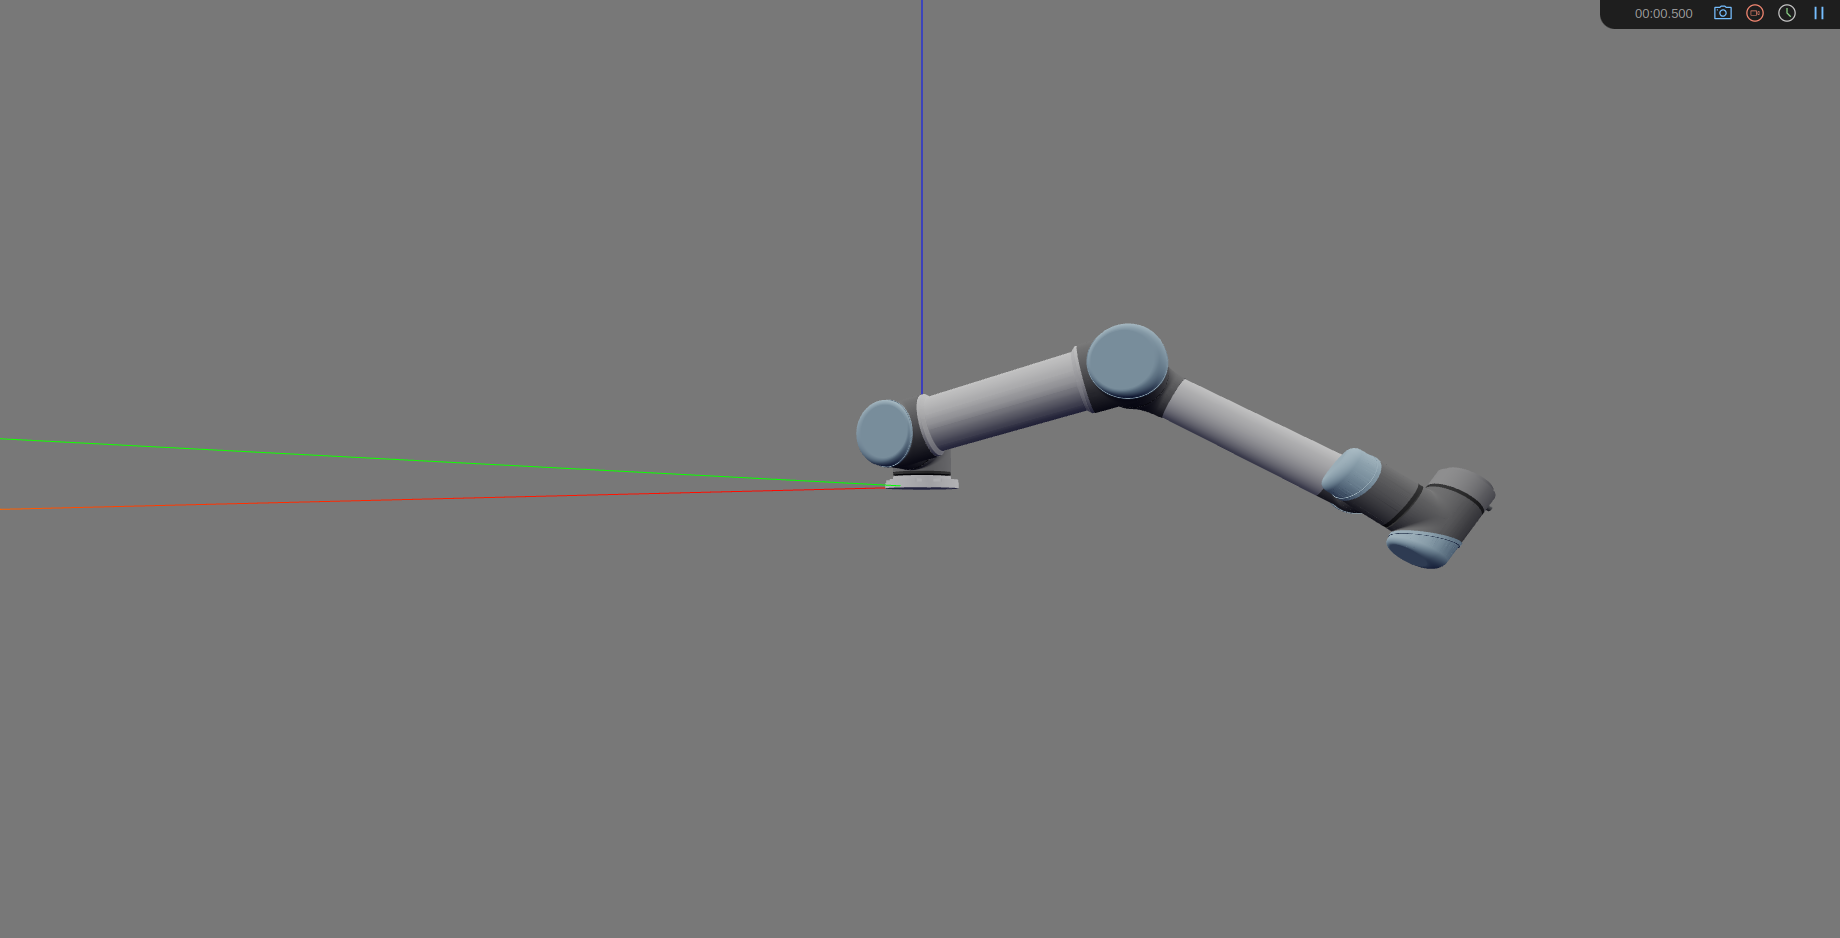

### Pose con moveit2

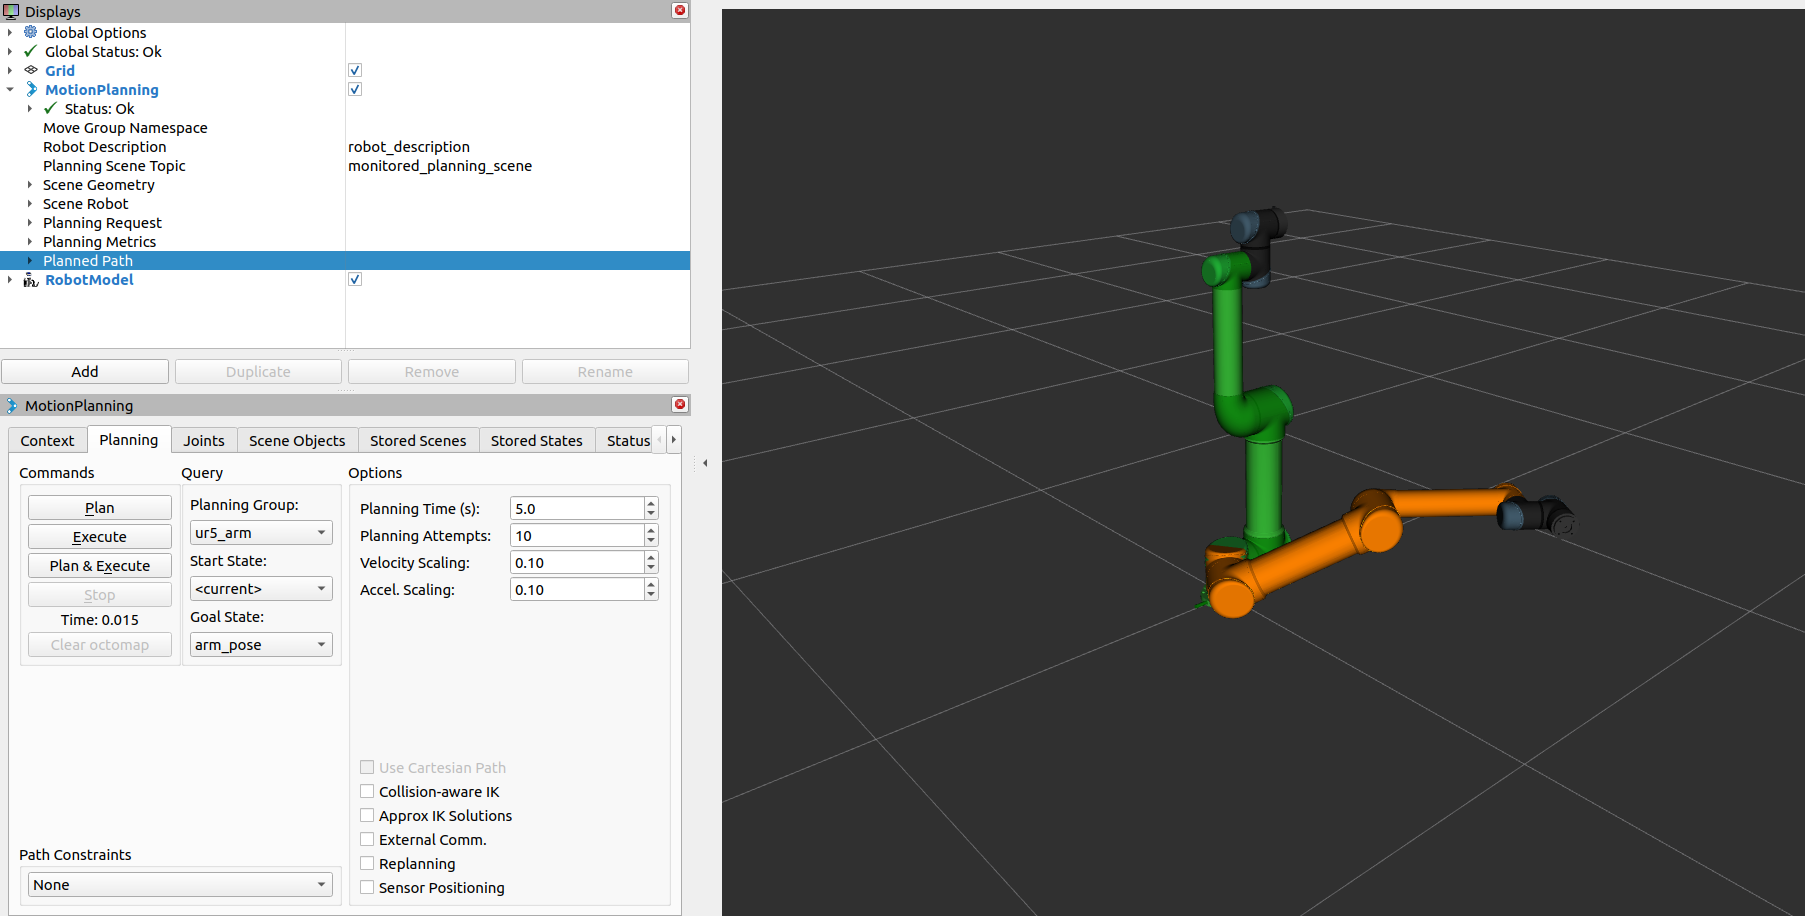

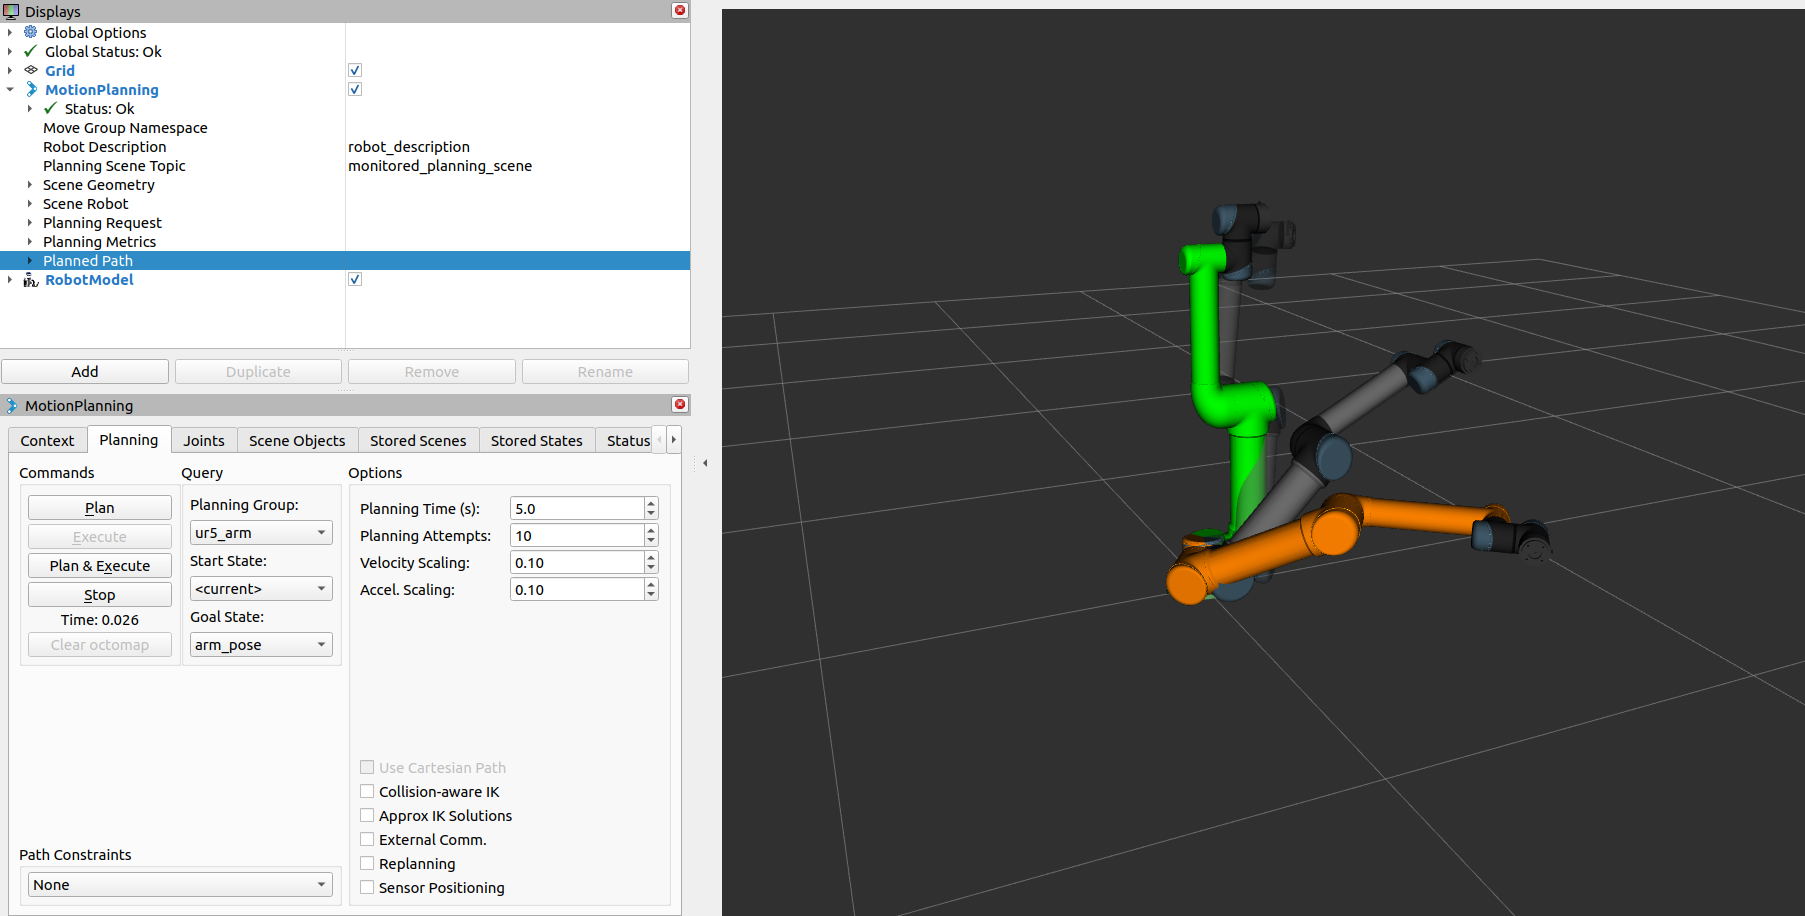

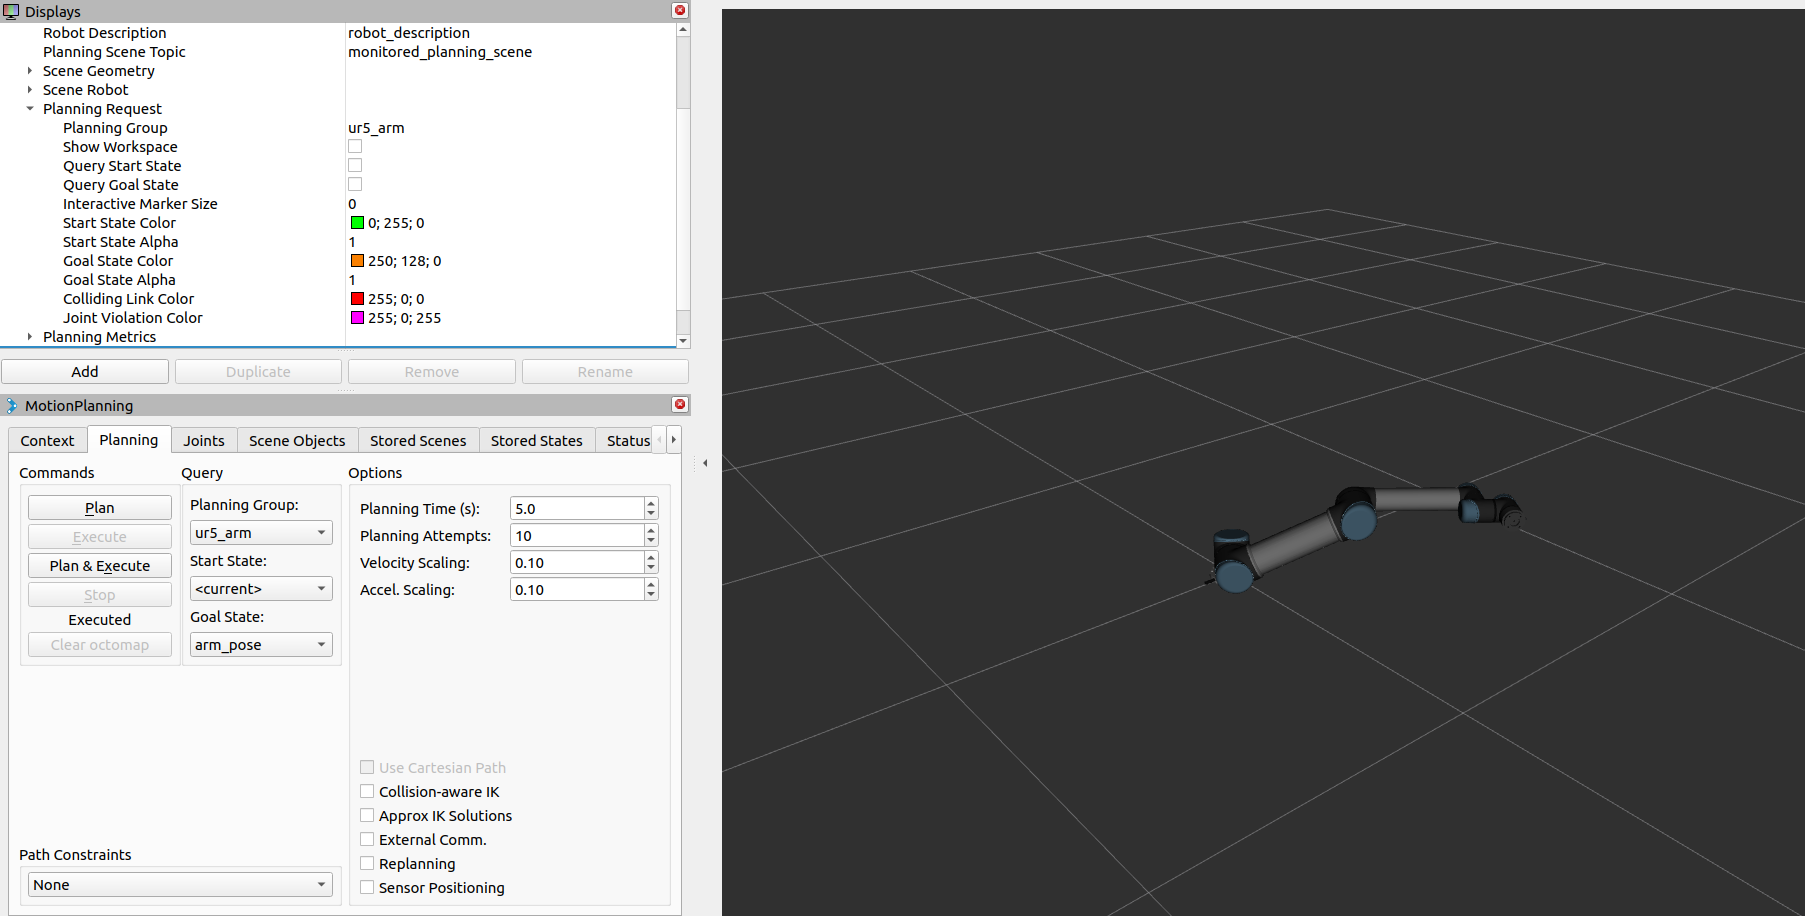